# function

## all

- all(iterable) 함수는 인자로 받은 반복 가능한 자료형(iterable)의 모든 요소가 참(True)이면 참(True)을 반환하는 함수
- 즉 리스트, 튜플, 집합, 딕셔너리, 문자열에 대해서 all 을 쓸 수 있다.

In [6]:
a = [1,2,3,4,5]
all([a[x]>a[x-1] for x in range(1,3)])

True

## any

- any(iterable) 함수는 인자로 받은 반복가능한 자료형(iterable)중 단 하나라도 참(True)이 있으면 참(True)를 반환한다.

In [7]:
a = [1,2,3,4,5]
any([a[x] == 3 for x in range(1,3)])

True

## copy / deepcopy

- copy 의 경우, 새로운 id 를 부여하게 되며, 그 요소들을 바꾼다 해도 복사된 변수에는 영향이 없다.

In [58]:
a = [1,2,3]
b = a.copy() # a[:] 도 가능하다.
print(id(a)) ; print(id(b))
a[1] = 'gogo' ; print(b) # a를 바꾸더라도 영향이 없음

1907314651656
1907314652104
[1, 2, 3]


- 하지만 리스트 안의 리스트처럼 , mutable 객체 안에 mutable 이 들어있을때에 문제가 된다
- 아래 처럼 id(a[0])과 id(b[0])은 같은 주소를 바라보고 있습니다.

In [68]:
a = [[1,2], [3,4]]
b = a[:]
print(id(a)) ; print(id(b))
print(id(a[0])) ; print(id(b[0])) # 안의 mutable 객체는 아예 같다. 
a[0][0] = 'gogo' ; print(b) # a를 바꾸었는데 b가 바뀌고 말았다. 

1907314604168
1907318369224
1907322478280
1907322478280
[['gogo', 2], [3, 4]]


- 위와 같이 '내부의 객체들' 에 까지 모두 새롭게 copy 하기 위해서는 deepcopy 메서드를 써야 한다. 

In [69]:
import copy
a = [[1,2],[3,4]]
b = copy.deepcopy(a)
a[1].append(5)
print(a) ; print(b)

[[1, 2], [3, 4, 5]]
[[1, 2], [3, 4]]


## def + return

- def 는 함수를 정의한다. 이때에 return 을 만나게 된다면 함수를 바로 빠져나와 호출한 쪽으로 되돌아간다.
- 아래와 같이 return 을 만나면 구문이 여러개 있더라도 다시 되돌아간다. 즉 return 은 def 안에서 어떻게 보면 sys.exit 와 같이 종료구문이라 생각해도 무방하다.

In [26]:
def operation(a,b) :
    return a+b
    return a*b
    return a-b

operation(5,2)
# 처음 만난 return a+b의 결과만 반환됨

7

## del

- del 은 '객체를 지우는것' 이 아니라 변수와 객체의 연결을 끊어내는 것이다.
- del 변수 로 사용할 수 있다. 
- 위 작업을 하면, 변수는 다시 사용하려 할 때에 정의된 적 없다는 에러가 뜨게 된다.

In [12]:
x = [1,2,3]

In [13]:
del(x[1]) ; x

[1, 3]

## dir

- dir은 객체가 자체적으로 가지고 있는 변수나 함수를 보여 준다.
- 잘 알지 못하는 객체를 만났을 때에, 그 객체가 어떤 method 를 가지고 있는지 등을 알게 된다.

In [37]:
print(dir([1, 2, 3]))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


## Enumerate

- zip(*iterable)은 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수이다.
- 반복문 사용 시 몇 번째 반복문인지 확인이 필요할 수 있다.
    - subplot 과 함께 사용해서, 각 위치에 i번째 plot을 그려주는 형식으로 쓸 수 있다.
- 이때, 시작 index 가 0 부터임을 기억하자.


In [30]:
for i, name in enumerate(['딸기','사과','포토']):
    print(i, name)

0 딸기
1 사과
2 포토


## Filter

- filter함수는 특정 조건으로 걸러서 걸러진 요소들로 iterator객체를 만들어서 리턴해준다.
- map함수와 사용 방법은 동일하다. 하지만 함수의 결과가 참인지 거짓인지에 따라, 해당 요소를 포함할지를 결정한다.
- 

In [7]:
target = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 함수를 정의한다.
def is_even(n):
    return True if n % 2 == 0 else False

# filter 를 통해서 map 과 같이 target 에 함수를 적용한다.
# 이 때에 filter 에서 'TRUE'를 뽑아내는 경우에만 target 값에서 뽑아낸다.
result = filter(is_even, target)

# result 는 filter 객체이기 떄문에 list 로 변환시켜주어야 한다.
print(list(result))

[2, 4, 6, 8, 10]


## in / not in 

- x in 리스트	/ x not in 리스트
- x in 튜플	/ x not in 튜플
- x in 문자열 / x not in 문자열


In [15]:
1 in [1, 2, 3] # 1 이 list 안에 있는가?

True

## len

- len(s)은 입력값 s의 길이(요소의 전체 개수)를 돌려주는 함수이다.
- .size 등의 메소드가 있지만 이는 각 packages 에서나 통용되는것이기 때문에 위같은 내장함수를 알아두는것이 편리히다.

In [28]:
lis = ['a','b']
len(lis)

2

## Lambda

- Lamda 함수는 (lambda x,y: x + y)(10, 20) 처럼 함수 def 없이 바로 적용하게 해준다.
- 아래와 같이 map 이나 filter 등에서 사용된다.

In [9]:
# custom 과 아래 lambda는 같은 함수를 정의하고 있다.
# lambda 다음에 붙어있는것은 변수(input) 이고, : 뒤의 값은 결과(output) 을 나타내게 된다.
def custom(x,y):
    return(x+y)

In [10]:
(lambda x,y : x+y)(1,3)

4

In [1]:
list(map(lambda x: x ** 2, range(5)))

[0, 1, 4, 9, 16]

In [2]:
list(filter(lambda x: x % 2, range(10)))

[1, 3, 5, 7, 9]

## max/min

- max 도 마찬가지로 sum 과 같이 작동가능하다.

In [10]:
max([1,2,3])

3

## map

- iterable객체를 받아서, 각 요소에 함수를 적용해주는 함수이다.
- map은 원본 리스트를 변경하지 않고 새 리스트를 생성
- 모든 element 들에 대해서 같은 적용을 하고 싶을때에 자주 사용한다.
    - ex) str.map(lambda x : x.zfill(3))


In [11]:
# 리스트의 모든 값을 정수로 변환하고 싶다고 하자.
# MAP 함수를 모른다면 아래와 같이 for 문으로 일일히 int 함수를 적용시켜야 한다.
lis = [1.2, 2.5, 3.7, 4.6]
for i in range(len(lis)):
    lis[i] = int(lis[i])
lis

[1, 2, 3, 4]

In [12]:
# 하지만 아래와 같이 적용 가능
lis = list(map(int, lis))
lis

[1, 2, 3, 4]

## open

- 파일을 여는 함수
- r 은 읽을때 사용
- w 은 파일을 작성할 때 사용

In [ ]:
# ex = open('example.txt','r')

## print

- 문자열을 출력하는 함수
- 기본적으로 print 함수를 쓸때마다, 줄바꿈으로 문자가 바뀐다. 
    - 이를 수정하기 위해서는 end 를 바꾸어 주면 된다.
- 변수의 '이름' 이 아니라 그 '값' 을 출력하고 싶다면 그 앞에 f 를 쓴 뒤 중괄호로 변수를 싸주면 된다.

In [24]:
a = 10 ; b = 20
print('x') ; print('y') # x,y 가 줄바꿈으로 구분되어 출력되고있다.
print('x',end = ' ') ; print('y') # x,y 가 띄어쓰기를 경계로 구분되고 있다.
print(f'{a} 와 {b}') # f string 을 이용해 변수의 '값' 을 출력하고 있는 모습

x
y
x y
10 와 20


## reversed

- mutable 한 객체를 reverse 하게 만들고 싶을때 쓴다.
- [1,2,3].reverse() 를 해버리면 원래 list 가 없어지고 inplace 하게 reversed 가 되어서 불편할 떄가 많은데, 그럴 때에 사용하는 함수가 reversed

In [30]:
lis = [1,4,3,2,5]

In [34]:
print(list(reversed(lis)))
print(lis)

[5, 2, 3, 4, 1]
[1, 4, 3, 2, 5]


## range

- range(a,b) : a,a+1.....b-1 의 range 객체를 만든다.
- range(a,b,k) : a,a+k... 으로 간격이 k 가 됨
    - 이때 k 는 음수도 가능합니다.
    - 다만 음수를 넣으려고 한다면 , a>b 가 되어야 합니다.
- range(a,a) : 이 경우 아무것도 출력하지 않습니다.

In [2]:
for i in range(0):
    print(i)

In [1]:
for i in range(10,10):
    print(i)

## sorted

- sorted 를 통해서 iterable 객체를 정렬할 수 있다.
- .sort() 는 list 만 가능하지만 위 sorted 는 iterable 객체에 대해서 모두 성립한다.

- 내림차순 정렬 : sorted({},reverse=True))
- 기준을 선택해 정렬 : sorted(a, key = lambda x : x[0]) # element의 의 첫번째 인자가 기준이 되어 정렬된다.
- 기준을 여러개 선택해 정렬 sorted(a, key = lambda x : (x[0],x[1])) # element 의 첫번쨰, 두번째 인자가 차례로 기준이 되어 정렬됨 

In [33]:
sorted({3: 'D', 2: 'B', 5: 'B', 4: 'E', 1: 'A'})

[1, 2, 3, 4, 5]

In [27]:
# a 의 element 가 list 여도 아래가 성립한다.
a = [(1, 2), (0, 1), (5, 1), (5, 2), (3, 0)]

In [28]:
# 인자없이 그냥 sorted()만 쓰면, 리스트 아이템의 각 요소 순서대로 정렬을 한다.
b = sorted(a)
# b = [(0, 1), (1, 2), (3, 0), (5, 1), (5, 2)]
# key 인자에 함수를 넘겨주면 해당 함수의 반환값을 비교하여 순서대로 정렬한다.
c = sorted(a, key = lambda x : x[0])
# c = [(0, 1), (1, 2), (3, 0), (5, 1), (5, 2)]
d = sorted(a, key = lambda x : x[1])
# d = [(3, 0), (0, 1), (5, 1), (1, 2), (5, 2)]
e = sorted(a, key = lambda x: (x[0],x[1]))
# e = [(0, 1), (1, 2), (3, 0), (5, 1), (5, 2)]

## sum

- List 나 dict 가 자체적으로 연산은 불가능하지만 sum 의 메소드는 작동한다
- 즉 평균이나 합은 쉽게 구할 수 있다.

In [35]:
sum([1,2,3])
sum({1,2,3})

6

## type

- type 은 객체에 대한 자료형이 무엇인지 알려 주는 함수이다.
- 어떤 형태인지 알기 위해서 쓸 수 있다.
    - pandas 에 .dtype 등의 메서드가 있지만 위 type 은 내장함수이기 때문에 범용적으로 사용된다. 

In [14]:
type("abc")

str

## range

- range([start,] stop [,step] )는 for문과 함께 자주 사용하는 함수이다. 이 함수는 입력받은 숫자에 해당하는 범위 값을 반복 가능한 객체로 만들어 돌려준다.

In [21]:
lis = []
for i in range(1,5):
    lis.append(i)
lis

[1, 2, 3, 4]

In [22]:
# range 와 np.arange 는 거의 똑같다. 거의 같다고 보면 된다.
lis = []
for i in np.arange(1,5):
    lis.append(i)
lis

[1, 2, 3, 4]

## zip

- 파이썬 에서는 zip이라는 내장함수가 있다. zip() 은 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수이다.
- dataframe 의 column 을 df.columns 로 리스트 형태로 받은 뒤, 그에 따른 weight 를 지정해 준 후 dict(zip 으로 묶어서 classification 시에 이용할 수 있다.
    - keras/lgbm 등은 weight 를 설정할 때에, 각 분류에 따른 가중치를 dict 형식으로 받는다.
- 또는 같은 길이의 list 를 여러개 묶은 뒤 for문을 한번에 적용할 수 있다.
    - fot i,j in zip(lis1,lis2): 로 쓴다면 i,j 를 한번에 쓸 수 있다.


In [4]:
fruits = ["Apple", "Pear", "Peach", "Banana"]
prices = [0.35, 0.40, 0.40, 0.28]

In [12]:
# 아래와같이 같은 길이의 list(혹은 numpy 도 사용할 수 있음)를 이용하면 dict로 변환가능
dic = dict(zip(fruits, prices))
print(dic)

{'Apple': 0.35, 'Pear': 0.4, 'Peach': 0.4, 'Banana': 0.28}


In [13]:
lis = list(zip(fruits,prices))
print(lis)

[('Apple', 0.35), ('Pear', 0.4), ('Peach', 0.4), ('Banana', 0.28)]


## list , tuple , set
- 각 패키지의 메소드마다 입력값으로 받는것이 다르다.
    - list 만 받는다던가, dict 형태로만 받는등....
- 그럴때에 맞는 형태로 바꾸기 위해서 쓰인다.

- **list( )**: 리스트 변환
- **tuple( )**: tuple 변환
- **set( )**: 집합 변환

## input

- input 은 어떠한 값을 입력받을때 사용된다.
- 주로 코딩테스트시에 많이 이용됨
- input 은 입력한 값은 string 으로 불러오기 때문에 따로 수로 지정하고 싶은 경우 int 를 사용자가 직접 지정해 주어야 한다.

**Example** 

- a,b = input().split()
    - 띄어쓰기로 구분된 값을 a,b 로 각각 받는다.
    - 2 4 -> a:2/b:4
- lis = list(input().split()) 
    - 띄어쓰기로 구분된 값을 list 형태로 받는다.
    - 5 6 3 2 1 -> lis:[5,6,3,2,1] 
- num=list(map(int, str(num))) 
    - num 을 각각 구분된 int 로 분해
    - 35243 -> num = [5,6,2,4,3]
- list(string) 
    - string 을 각각 구분된 글자로 분해
    - 'love' -> ['l','o','v','e']

## sys.exit

- 아예 프로그램을 종료해버는 역할을 한다.
- 원하는 답이 나와서 print('답') 만 하고, 나머지는 다 무시해버리고 싶을때에 사용! (재귀문에서 사용됨)

# Flow control

## if any(..for) / if all(..for)

- any 와 all 은 각각 하나라도 / 모두의 의미를 가지고 있다.
- 아래처럼 all 과 for문을 통해서 '모두 맞을때' 의 의미를 구성할 수 있다.
- all / any 는 iterable 를 입력으로 받아, 안의 모든것들이 True 거나 또는 하나 이상이 True 일 때에 True 를 반환한다.

In [23]:
lis = list(range(5))
if all([lis[1] < 10 for x in lis]):
    print(3)

3


## continue

- 코드를 continue 를 통해서 건너뛸 수 있다.
- continue 아래의 코드는 실행하지 않고 건너뛴 뒤 다음 반복을 시작한다.

In [19]:
for i in range(5):       # 0부터 5까지 증가하면서 반복
    if i % 2 == 0:         # i를 2로 나누었을 때 나머지가 0면 짝수
        continue           # 아래 코드를 실행하지 않고 건너뜀
    print(i)

1
3


In [23]:
i = 0
while i < 5:        
    i += 1            
    if i % 2 == 0: # 2의 배수이면 
        continue   # 같은 블록안의 싸~악 건너 띄고 '다음 반복'을 시작하세요~
    print(i)
print('이건무시못함') # 같은 줄에 있지를 않아서 이건 무시 못한다.

1
3
5
이건무시못함


## Break

- for와 while 문법에서 제어흐름을 벗어나기 위해 사용한다. 
- break는 제어흐름을 중단하고 빠져 나오지만
- continue는 제어흐름(반복)을 유지한 상태에서 코드의 실행만 건너뛰는 역할을 합니다


In [16]:
i = 0
while True:    # 무한 루프
    print(i)
    i += 1          # i를 1씩 증가시킴
    if i == 5:    # 5일때
        break       # 반복문을 끝냄. while의 제어흐름을 벗어남

0
1
2
3
4


In [7]:
for i in range(10000):    # 0부터 9999까지 반복b
    print(i)
    if i == 5:    # i가 100일 때
        break       # 반복문을 끝냄. for의 제어흐름을 벗어남
print('이건무시못하지') # for 문 뒤의 값은 무시 못한다.

0
1
2
3
4
5
이건무시못하지


## Pass

- 아무 일도 하지 않지만, if/while/for 등의 문장 구조 형태를 유지하고 싶다면 Pass 를 쓰자.

In [18]:
for i in range(10):    # 10번 반복
    pass               # 아무 일도 하지 않는다

In [21]:
if i == 0 :
    pass # 이 역시 마찬가지

## for else

- for문을 사용하다보면, 루프 중간에 break 문으로 빠져나오는 경우들이 있는데, 이게 break문이 걸려서 빠져나가는지 아닌지를 판단이 필요한 경우가 있습니다.
- for문과 같은 레벨에 else를 둬서 break없이 빠져나온 경우를 처리하는 방법이 있다.



In [20]:
for x in range(4):
    if x == 2:
        print ('loop out')
        break
else:
    print ('loop end')

loop out


-  위 예제의 경우는 x =2 에서 루프를 빠져나오기때문에, else문이 실행이 되지 않고, 'loop out' 이 출력이 된다.

In [23]:
for x in range(4):
    pass
else:
    print ('loop end')

loop end


- 위와 같은 경우는 , for loop가 break없이 빠져나왔으므로 'loop end' 가 출력이 된다.

## for while

- 각각의 작업들을 어떤 조건을 만족할때까지 수행시키고 싶다고 할 때에 사용합니다.

In [56]:
num = [1,2,3,4]
stack = [1,4,3,2]
for x in num: 
    while stack and stack[-1]<x: # 스택이 비거나, 제일 위의 스택이 num 의 값보다 작을때 멈춘다!
        stack.pop() 
print(stack)

[1, 4]


## try exept

- 다음에서 진행되는 flow 들은 에러발생시 어떻게 대처해야하는지의 구문들이다.

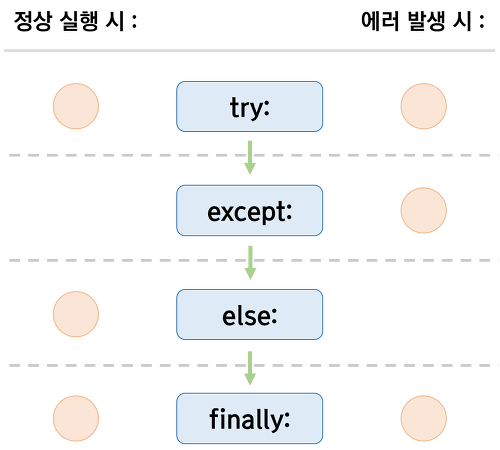

In [11]:
Image('./image/try.png')

- try, exept 문
- try 안에는 기본적으로 실행하는 코드를 넣ㅎ고, exept 절에는 에러가 발생했을 경우 시행할 코드를 넣는다.

In [14]:
try:
    print(5/0)
except:
    print('wrong division')

wrong division


## try except else

- try 절과 except 절에 else 를 추가하여 구성할 수 있다.
- else 는 예외가 발생하지 않아 except 절을 실행하지 않았을 때에 실행되는 구문이다

In [16]:
try:
    print(5/1)
except:
    print('error')
else:
    print('no error')

5.0
no error


## try except finally

- finally 절은 try 절에서 예외의 발생여부에 관계없이 항상 실행되는 절이다.

In [18]:
try:
    print(5/0)
except:
    print('error')
finally:
    print('end')

error
end


## 이중 for문 탈출

- 단일 for 문이라면 Break 를 통해서 빠져나올 수 있었다. 
- 하지만 이중 for 문이라면 어떨까?

In [64]:
a = 0 
for x in range(5):
    for y in range(5):
        a = y 
        print(a)
        if a == 1 : # a 가 1이 되면 모든 for 문을 중지시키고 싶다!
            break
print(a)

0
1
0
1
0
1
0
1
0
1
1


- 위처럼 print 를 할 때에 제대로 수행되지 않음을 볼 수 있다.
- 하나의 break 를 하게되면 그 바로 상단의 반복문, 즉 for y 의 부분을 중지시키기 때문이다.

In [71]:
a = 0 
for x in range(5):
    for y in range(5):
        a = y 
        if a == 1 : # a 가 1이 되면 모든 for 문을 중지시키고 싶다!
            break
    a = 2
    break 
print(a)

2


- 위와 같이 두번의 break 을 준다고 해도 결과는 같다. 둘이 '별개로' break 가 작용하기 때문에 둘의 break 는 연동되지 않는다. 
- 그 증거로 위에서 a = 2 를 시행하고 어서, 결과가 2가 나온것을 볼 수 있다.
- break 가 연동된다면 a = 1 이여야 한다.

In [67]:
a = 0 
switch = False
for x in range(5):
    for y in range(5):
        a = y 
        if a == 1 : # a 가 1이 되면 모든 for 문을 중지시키고 싶다!
            switch = True
            break
    if switch :
        break

0
1


# Method

## Comprehension

- Comprehension이란 iterable한 오브젝트를 생성하기 위한 방법중 하나로 파이썬에서 사용할 수 있는 유용한 기능중 하나이다.
- set , list , dict 등등에 모두 쓰일 수 있다.
- 맨 앞의 값은, 실제로 들어가는 값이고, 그 뒤의 for 문은 어떤값이 들어갈지의 조건이다.

In [109]:
evens = [x * 2 for x in range(11)] ; print(evens)
ex = [x for x in range(10) if x % 3 ==0] ; print(ex) 

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[0, 3, 6, 9]


In [110]:
evens = {x * 2 for x in range(11)} ; print(evens)

{0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20}


In [13]:
p = [(x,y) for x,y in enumerate(range(5))] ; p

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]

## Packing/Unpacking

- Unpacking : 컬렉션의 요소들을 여러개의 변수에 나누어 담는 방법
- Packing : 여러개의 데이터를 컬렉션으로 묶어 변수에 대입하는것 

In [74]:
num = 1,2,3,4,5 ; print(num) # packing
a,b,c,d,e = num ; print(a) # unpacking

(1, 2, 3, 4, 5)
1


In [76]:
num = [1,2,3,4]
a,b,c,d = num ; print(a)

1
